In [16]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling ((un-)comment if you want)
import numpy as np               # math

# imports we need in addition for this lab sheet
from IPython import display as ipd
import scipy.signal as sig

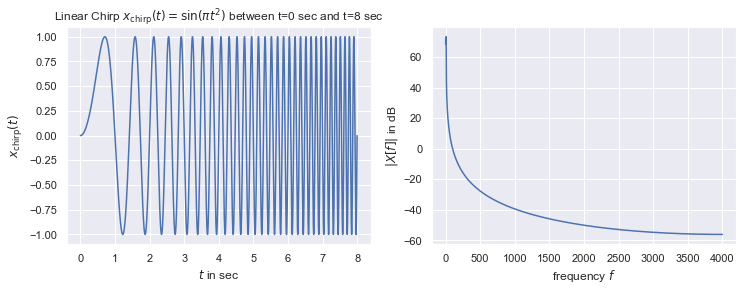

In [21]:
def nextPowerOf2(L):
    '''
    Calculates the smallest power of 2 which is bigger than input variable n
    
    This helper function can be used to calculate an appropriate 
    length for an DFT which is longer than the signal length n and a power of 2.
    
    Input:
        L: int
            signal length
    Output:
        p: integer which is greater or equal than n and a power of 2
    
    Examples:
        for L in range(20):
            print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2(L)))
            
        x=ones(11)
        L_FFT=nextPowerOf2(len(x))
    '''
    if (L<2):
        return 2
    # If n is a power of 2 then return n 
    if (L and not(L & (L - 1))):
        return L
    # If n is NOT a power of 2 
    p = 1
    while (p < L) :
        p <<= 1 
    return p

def generate_chirp(t1=0,t2=10,fs=8000):
    '''
    Generates a chirp signal by implementing $x(t)=sin(\pi t^2)$
    
    Input:
        t1: float, optional
            start time (in seconds), default: start at 0 seconds
        t2: float, optional
            end time (in seconds), default: end at 10 seconds
        fs: float, optional
            sampling frequency in Hz, default: 8000 Hz
    Output:
        chirp signal
    
    Example use:
        x=generate_chirp(50,70,fs) 
    '''
    length=t2-t1 # signlal length in seconds
    t = np.linspace(t1, t2, length*fs) # time vector from t1 to t2
    return np.sin(np.pi*t**2)
fs = 8000
t1 = 0
t2 = 8
x = generate_chirp(t1,t2,fs)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
t = np.linspace(t1,t2,(t2-t1)*fs)
plt.plot(t,x)
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')
plt.title('Linear Chirp $x_{\mathrm{chirp}}(t)=\mathrm{sin}(\pi t^2)$ between t='+str(t1)+' sec and t='+str(t2)+' sec')

L_FFT = nextPowerOf2(len(x))
X = np.fft.rfft(x,n=L_FFT)
f = np.fft.rfftfreq(L_FFT,d=1./fs)
plt.subplot(1,2,2)
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')

ipd.Audio(x,rate=fs)


(0.0, 50.0)

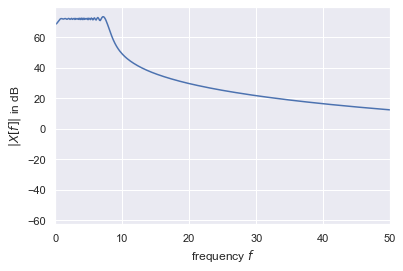

In [22]:
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
plt.xlim([0,50])
